In [19]:
import os
from typing import List

import torch

import cv2
import matplotlib.pyplot as plt
import numpy as np
from facenet_pytorch import MTCNN
from emotiefflib.facial_analysis import EmotiEffLibRecognizer, get_model_list

In [ ]:
#   !pip install emotiefflib  
# if not already

In [ ]:
# Auxiliary functions

def recognize_faces(frame: np.ndarray, device: str) -> List[np.array]:
    """
    Detects faces in the given image and returns the facial images cropped from the original.

    This function reads an image from the specified path, detects faces using the MTCNN
    face detection model, and returns a list of cropped face images.

    Args:
        frame (numpy.ndarray): The image frame in which faces need to be detected.
        device (str): The device to run the MTCNN face detection model on, e.g., 'cpu' or 'cuda'.

    Returns:
        list: A list of numpy arrays, representing a cropped face image from the original image.

    Example:
        faces = recognize_faces('image.jpg', 'cuda')
        # faces contains the cropped face images detected in 'image.jpg'.
    """

    def detect_face(frame: np.ndarray):
        mtcnn = MTCNN(keep_all=False, post_process=False, min_face_size=40, device=device)
        bounding_boxes, probs = mtcnn.detect(frame, landmarks=False)
        if probs[0] is None:
            return []
        bounding_boxes = bounding_boxes[probs > 0.9]
        return bounding_boxes

    bounding_boxes = detect_face(frame)
    facial_images = []
    for bbox in bounding_boxes:
        box = bbox.astype(int)
        x1, y1, x2, y2 = box[0:4]
        facial_images.append(frame[y1:y2, x1:x2, :])
    return facial_images

### EmotiEffLib with PyTorch

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = get_model_list()[0]

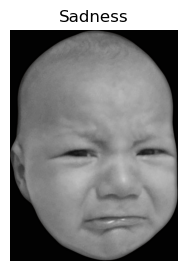

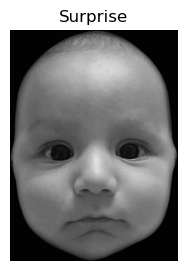

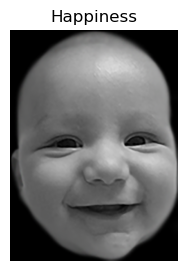

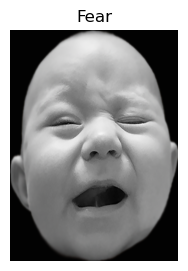

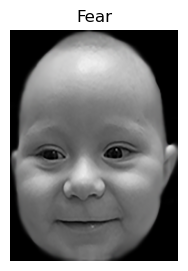

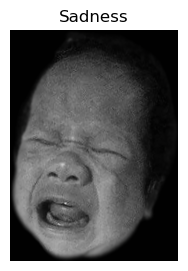

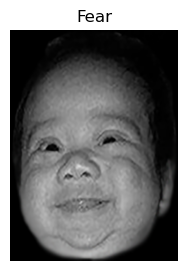

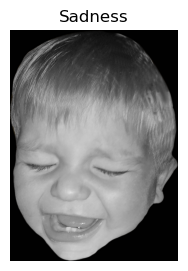

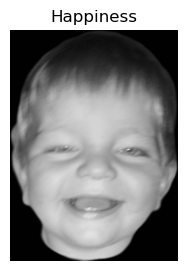

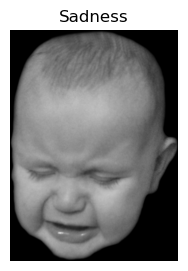

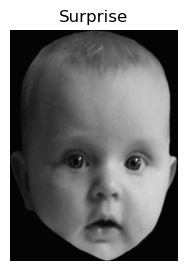

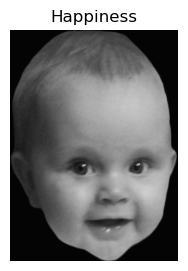

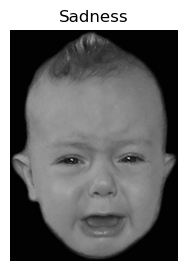

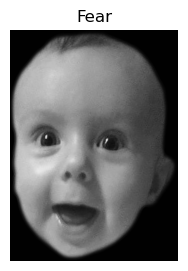

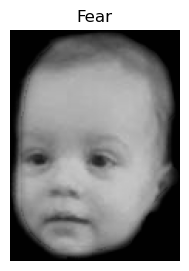

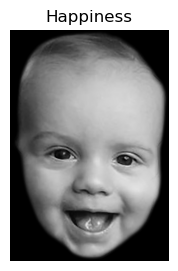

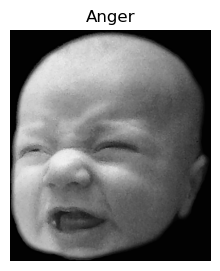

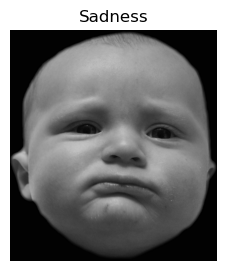

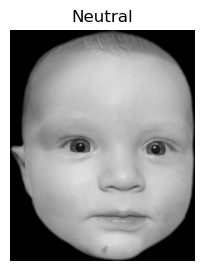

In [14]:
folder_path = "../data/CityInfant/BlackWhite"  
image_files = sorted(os.listdir(folder_path))[1:20] 

# Load Emotion Recognition Model
fer = EmotiEffLibRecognizer(engine="torch", model_name=model_name, device=device)  

# Loop through the first 10 images
for img_file in image_files:
    input_file = os.path.join(folder_path, img_file)

    # Read and process image
    frame_bgr = cv2.imread(input_file)
    frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)

    # Recognize faces
    facial_images = recognize_faces(frame, device=device)  # Modify according to your function

    # Predict emotions
    emotions = []
    for face_img in facial_images:
        emotion, _ = fer.predict_emotions(face_img, logits=True)
        emotions.append(emotion[0])

        # Display the image with emotion label
        plt.figure(figsize=(3, 3))
        plt.axis("off")
        plt.imshow(frame)
        plt.title(emotion[0])
        plt.show()

### ResNet50 ??

In [ ]:
from keras.applications import ResNet50

# Print the ResNet50 model summary to confirm it exists and is working
model = ResNet50(weights='imagenet')
model.summary()
